In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
#read the data
df = pd.read_csv("/content/drive/My Drive/datsets_datascience/Ecoli2_85.csv")
df.head()

,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
0,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
1,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
2,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
3,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0
4,0.67,0.39,0.48,0.5,0.36,0.38,0.46,0


In [0]:
y = df['0']
x = df.drop(['0'],axis=1)

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
cv_scoreDT =[]
dt_res = []
rd_res = []
i=1
for train_index,test_index in Skf.split(x,y):
  print('{} of KFold {}'.format(i,Skf.n_splits))
  x_tr,x_te = x.iloc[train_index], x.iloc[test_index]
  y_tr,y_te = y.iloc[train_index], y.iloc[test_index]
#Training and Fitting a decision tree
  dt_clf = DecisionTreeClassifier(min_samples_split=10,
                                  random_state=45)
  dt_clf.fit(x_tr, y_tr)
  #performing cross validation for 10-folds
  scores = f1_score(y_te, dt_clf.predict(x_te))
  print('DT F1:',scores)
  dt_res.append(scores)
  
  #random forest
  rd_clf = RandomForestClassifier(oob_score = False, random_state=22, n_estimators= 100)
  rd_clf.fit(x_tr, y_tr)
  pred_clf = rd_clf.predict(x_te)
  rd_scores = f1_score(y_te, dt_clf.predict(x_te))
  print('random forest F1:',rd_scores)
  rd_res.append(rd_scores)
  i += 1

1 of KFold 10
DT F1: 0.6666666666666666
random forest F1: 0.6666666666666666
2 of KFold 10
DT F1: 0.7499999999999999
random forest F1: 0.7499999999999999
3 of KFold 10
DT F1: 0.7272727272727272
random forest F1: 0.7272727272727272
4 of KFold 10
DT F1: 0.9090909090909091
random forest F1: 0.9090909090909091
5 of KFold 10
DT F1: 0.8333333333333334
random forest F1: 0.8333333333333334
6 of KFold 10
DT F1: 0.7272727272727272
random forest F1: 0.7272727272727272
7 of KFold 10
DT F1: 0.7272727272727272
random forest F1: 0.7272727272727272
8 of KFold 10
DT F1: 0.5714285714285715
random forest F1: 0.5714285714285715
9 of KFold 10
DT F1: 0.888888888888889
random forest F1: 0.888888888888889
10 of KFold 10
DT F1: 0.888888888888889
random forest F1: 0.888888888888889


In [7]:
print('baseline dt-->',np.mean(dt_res))
print('baseline rd-->',np.mean(rd_res))

baseline dt--> 0.769011544011544
baseline rd--> 0.769011544011544


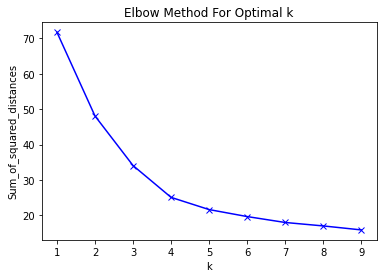

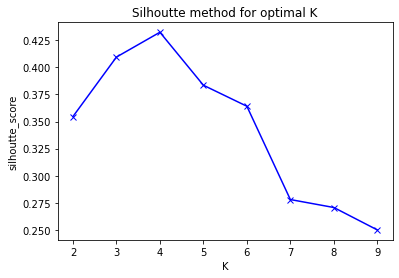

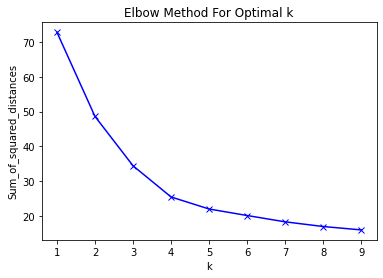

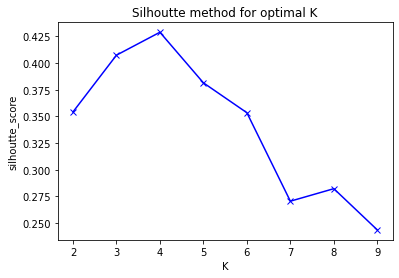

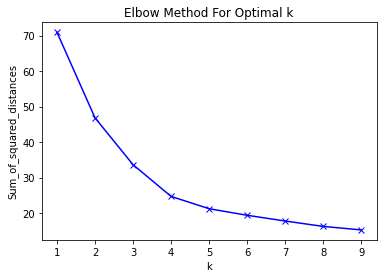

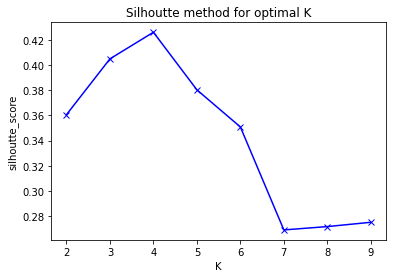

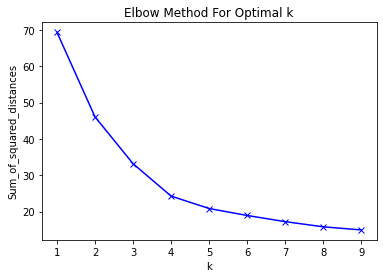

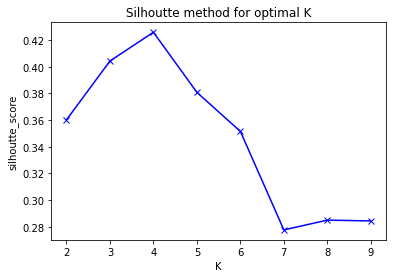

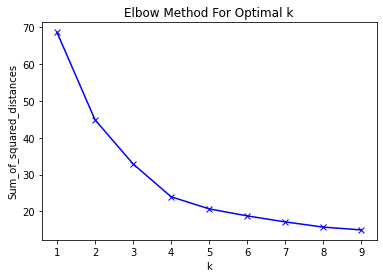

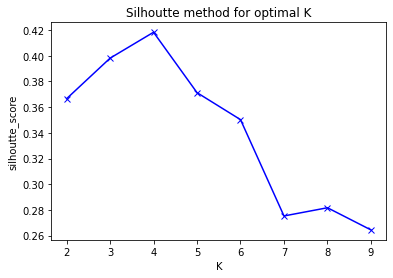

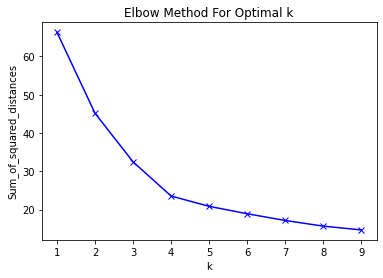

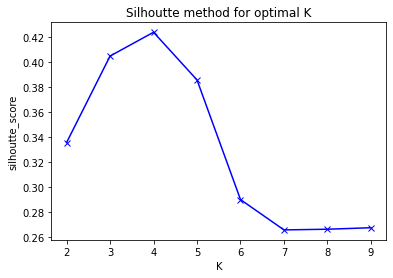

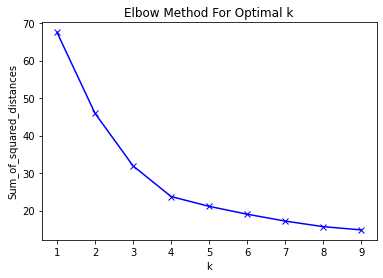

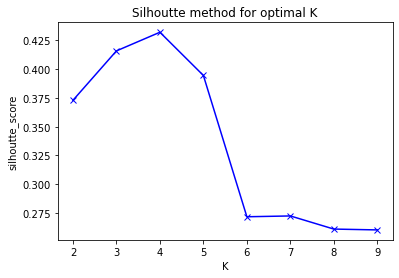

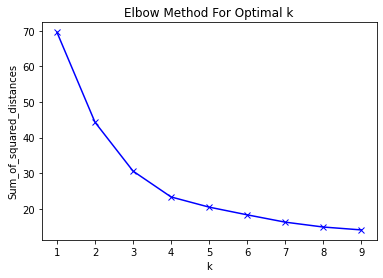

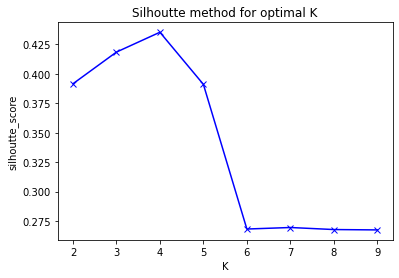

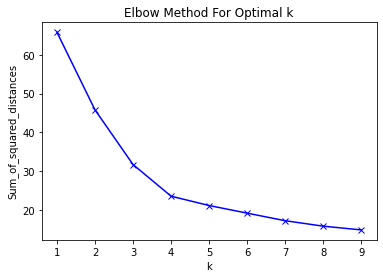

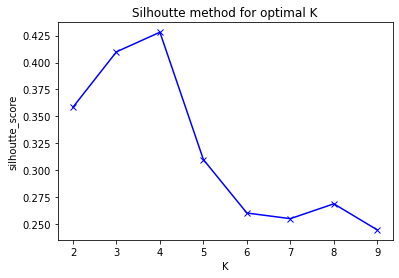

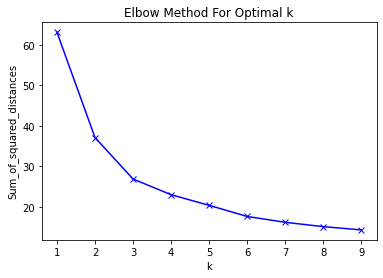

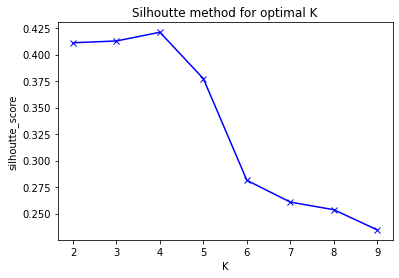

In [8]:
data_trans = 0
True_label = 0
skf = StratifiedKFold(n_splits=10)
# summerising the distributions after split into 10 bins
for train_index,test_index in skf.split(x,y):     #main for loop
    #print("TRAIN:", train_index, "TEST:", test_index)
  X_train,X_test = x.iloc[train_index], x.iloc[test_index]
  Y_train,Y_test = y.iloc[train_index], y.iloc[test_index]

  mms = MinMaxScaler()
  data_transformed= mms.fit_transform(X_train)
  data_transformed_test = mms.fit_transform(X_test)
  Sum_of_squared_distances = []
  K = range(1,10)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    squared_Sum = Sum_of_squared_distances.append(km.inertia_)

#silhoutte method
  sil = []
  K_sil = range(2,10)

  for Ks in K_sil:
    kmeans = KMeans(n_clusters = Ks)
    kmeans = kmeans.fit(data_transformed)
    labels = kmeans.labels_
    sil.append(silhouette_score(data_transformed,labels,metric = 'euclidean'))

  #graph for elbow method
  plt.figure()
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()

  #graph for silhoutte
  plt.figure()
  plt.plot(K_sil,sil,'bx-')
  plt.xlabel('K')
  plt.ylabel('silhoutte_score')
  plt.title('Silhoutte method for optimal K')
  plt.show()

In [9]:
k = 4
#elbow for identified number of clusters
km = KMeans(n_clusters = k)
km = km.fit(data_transformed)
squared_Sum = Sum_of_squared_distances.append(km.inertia_)

for clusters,features,true_label in zip(km.labels_,data_transformed,Y_train):
  print(features,"cluster = ",clusters, "labels=",true_label)
  print('-----------------------------------------------------')

[0.07865169 0.28571429 0.         0.         0.72       0.32989691
 0.44444444] cluster =  1 labels= 0
-----------------------------------------------------
[0.62921348 0.28571429 0.         0.         0.65333333 0.35051546
 0.46464646] cluster =  1 labels= 0
-----------------------------------------------------
[0.66292135 0.39285714 0.         0.         0.69333333 0.43298969
 0.36363636] cluster =  3 labels= 0
-----------------------------------------------------
[0.25842697 0.19047619 0.         0.         0.73333333 0.22680412
 0.35353535] cluster =  1 labels= 0
-----------------------------------------------------
[0.75280899 0.27380952 0.         0.         0.48       0.36082474
 0.46464646] cluster =  3 labels= 0
-----------------------------------------------------
[0.3258427  0.14285714 0.         0.         0.58666667 0.20618557
 0.34343434] cluster =  1 labels= 0
-----------------------------------------------------
[0.23595506 0.21428571 0.         0.         0.68       0.

In [0]:
#storing cluster number and respective centroids with number of samples
  temp_0 = np.array([]) # cluster 0 with minority class
  temp_1 = np.array([])# cluster 1 with minority class
  temp_2 = np.array([])
  temp_3 = np.array([])
  temp_4 = np.array([]) 
  count_0 = 0
  count_1 = 0

  for cluster,centroid,labels in zip(km.labels_,data_transformed,Y_train):
      if(cluster==0 and labels == 1):
          temp_0 = np.append(temp_0 ,[centroid,"cluster",cluster,'labels',labels])
      if(cluster==1 and labels == 1):
          temp_1 = np.append(temp_1 ,[centroid,"cluster",cluster,'labels',labels])
      if(cluster==2 and labels == 1):
          temp_2 = np.append(temp_2 ,[centroid,"cluster",cluster,'labels',labels])
      if(cluster==3 and labels == 1):
          temp_3 = np.append(temp_3 ,[centroid,"cluster",cluster,'labels',labels])
      if(cluster==4 and labels == 1):
          temp_4 = np.append(temp_4 ,[centroid,"cluster",cluster,'labels',labels])
      

In [0]:
 #getting each cluster as a whole to train random forest for each cluster data
  temp_5 = np.array([])
  temp_6 = np.array([])
  temp_7 = np.array([])
  temp_8 = np.array([])
  temp_9 = np.array([])
  temp_10 = np.array([])
  temp_11 = np.array([])
  temp_12 = np.array([])
  temp_13 = np.array([])
  temp_14 = np.array([])

  for cluster,centroid,labels in zip(km.labels_,data_transformed,Y_train):
      if(cluster==0):
          temp_5 = np.append(temp_5 ,centroid)#centrid of cluster 1
          temp_6 = np.append(temp_6,labels)#labells of cluster 1
      if(cluster==1):
              temp_7 = np.append(temp_7 ,centroid)#centroid of cluster 2
              temp_8 = np.append(temp_8,labels)#label of cluster 2
      if(cluster==2):
              temp_9 = np.append(temp_9 ,centroid)#centroid of cluster 3
              temp_10 = np.append(temp_10,labels)#label of cluster 3
      if(cluster==3):
              temp_11 = np.append(temp_11 ,centroid)#centroid of cluster 4
              temp_12 = np.append(temp_12,labels)#label of cluster 4
      if(cluster==4):
              temp_13 = np.append(temp_13 ,centroid)#centroid of cluster 5
              temp_14 = np.append(temp_14,labels)#label of cluster 5

In [0]:
#cluster 1
clust1_train = temp_5
clust1_label = temp_6
clust1_train = np.reshape(clust1_train,(-1,7)) # cluster 1
# print(clust1_train)
# print(clust1_train.shape)
#cluster 2
clust2_train = temp_7
clust2_label = temp_8
clust2_train = np.reshape(clust2_train,(-1,7)) # cluster 2
# print(clust2_train)
# print(clust2_train.shape)

#cluster 3
clust3_train = temp_9
clust3_label = temp_10
clust3_train = np.reshape(clust3_train,(-1,7))

#cluster 4
clust4_train = temp_11
clust4_label = temp_12
clust4_train = np.reshape(clust4_train,(-1,7))

#cluster 5
clust5_train = temp_13
clust5_label = temp_14
clust5_train = np.reshape(clust5_train,(-1,7))



In [24]:
#Training random forest model for each clusters-elbow method
#cluster 1
rd_clf_1 = RandomForestClassifier(random_state=22, n_estimators= 100)
rd_clf_1.fit(clust1_train, clust1_label)
#cluster 2
rd_clf_2 = RandomForestClassifier(random_state=22, n_estimators= 100)
rd_clf_2.fit(clust2_train, clust2_label)
#cluster 3
rd_clf_3 = RandomForestClassifier(random_state=22, n_estimators= 100)
rd_clf_3.fit(clust3_train, clust3_label)
#cluster 4
rd_clf_4 = RandomForestClassifier(random_state=22, n_estimators= 100)
rd_clf_4.fit(clust4_train, clust4_label)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [25]:
from sklearn.metrics import f1_score
predict_1 = rd_clf_1.predict(data_transformed_test)
score_1 = f1_score(Y_test, predict_1)
print(predict_1)
print('score_clf1-->',score_1)

predict_2 = rd_clf_2.predict(data_transformed_test)
score_2 = f1_score(Y_test, predict_2)
print(predict_2)
print('score_clf2-->',score_2)

predict_3 = rd_clf_3.predict(data_transformed_test)
score_3 = f1_score(Y_test, predict_3)
print(predict_3)
print('score_clf3-->',score_3)

predict_4 = rd_clf_4.predict(data_transformed_test)
score_4 = f1_score(Y_test, predict_4)
print(predict_4)
print('score_clf4-->',score_4)

result_f1 = [score_1,score_2,score_3,score_4]
result_f1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
score_clf1--> 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
score_clf2--> 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
score_clf3--> 0.0
[0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1.]
score_clf4--> 0.2


[0.0, 0.0, 0.0, 0.2]

In [18]:
cluster_test = km.predict(data_transformed_test)
print(cluster_test)
res_clus_test = f1_score(Y_test,cluster_test, average='micro')
res_clus_test

[2 1 2 3 1 3 1 3 3 3 3 3 3 3 1 1 1 1 0 1 1 3 1 3 1 2 3 1 2 1 1 1 3]


0.12121212121212122

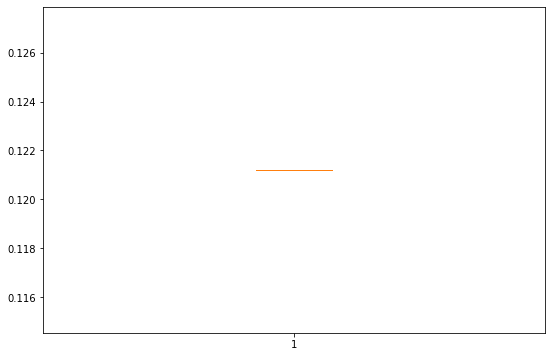

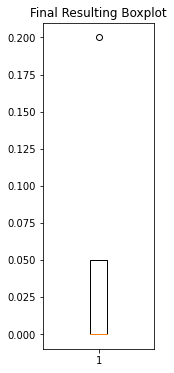

[0.0, 0.0, 0.0, 0.2]
0.05
average: 0.05
std deviation: 0.08660254037844388


In [26]:
# Create the boxplot
plt.figure(figsize=(9, 6))
plt.boxplot(res_clus_test)
plt.show()

# Create the boxplot
plt.figure(figsize=(2, 6))
plt.title('Final Resulting Boxplot')
plt.boxplot(result_f1)
plt.show()
print(result_f1)
print(np.mean(result_f1))
print('average:',np.mean(result_f1))
print('std deviation:',np.std(result_f1))